Data Import and Basic Overview

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

Data Preprocessing

In [8]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for 'bytes_in' with the median
df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)

# Drop rows where 'src_ip' or 'dst_ip' are missing
df.dropna(subset=['src_ip', 'dst_ip'], inplace=True)

# Convert 'creation_time' and 'end_time' to datetime format
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Check if there are any duplicate rows and remove them if any
df = df.drop_duplicates()

# Display changes and current state of the DataFrame
print(df.info())

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object

<ipython-input-8-e71f5880c91b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)


Exploratory Data Analysis (EDA)

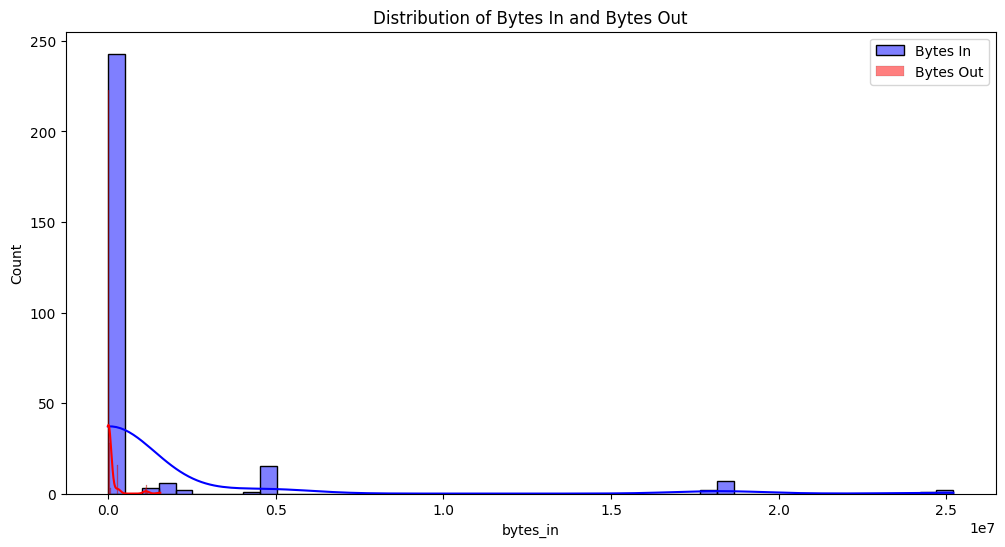

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of bytes_in and bytes_out
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='blue', kde=True, label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='red', kde=True, label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

<ipython-input-10-673ed7739aff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='viridis')


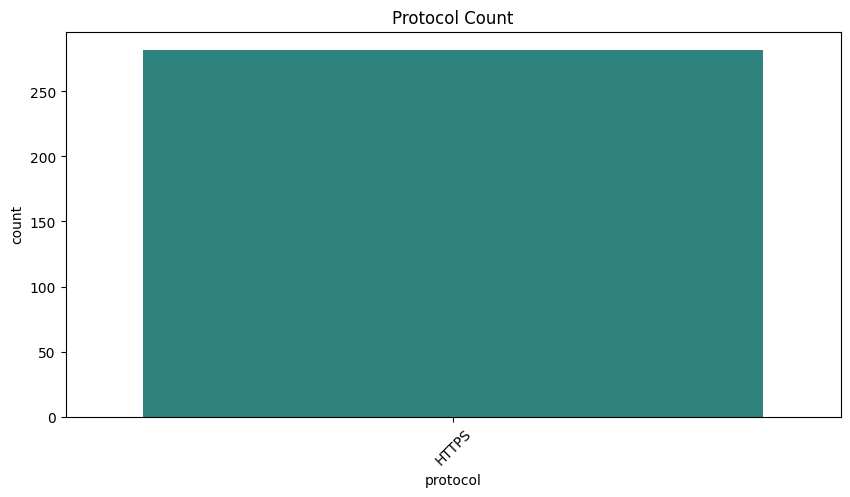

In [10]:
# Count of Protocols Used
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

Feature Engineering

In [11]:
import pandas as pd

# Assuming df is your DataFrame and the datetime conversion was successful
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate session duration in seconds
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# Calculate average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

# Print the updated DataFrame to check the new features
print(df[['creation_time', 'end_time', 'session_duration', 'avg_packet_size']].head())

              creation_time                  end_time  session_duration  \
0 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00             600.0   
1 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00             600.0   
2 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00             600.0   
3 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00             600.0   
4 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00             600.0   

   avg_packet_size  
0        30.986667  
1        81.830000  
2        69.956667  
3        74.706667  
4        34.030000  


Data Visualization

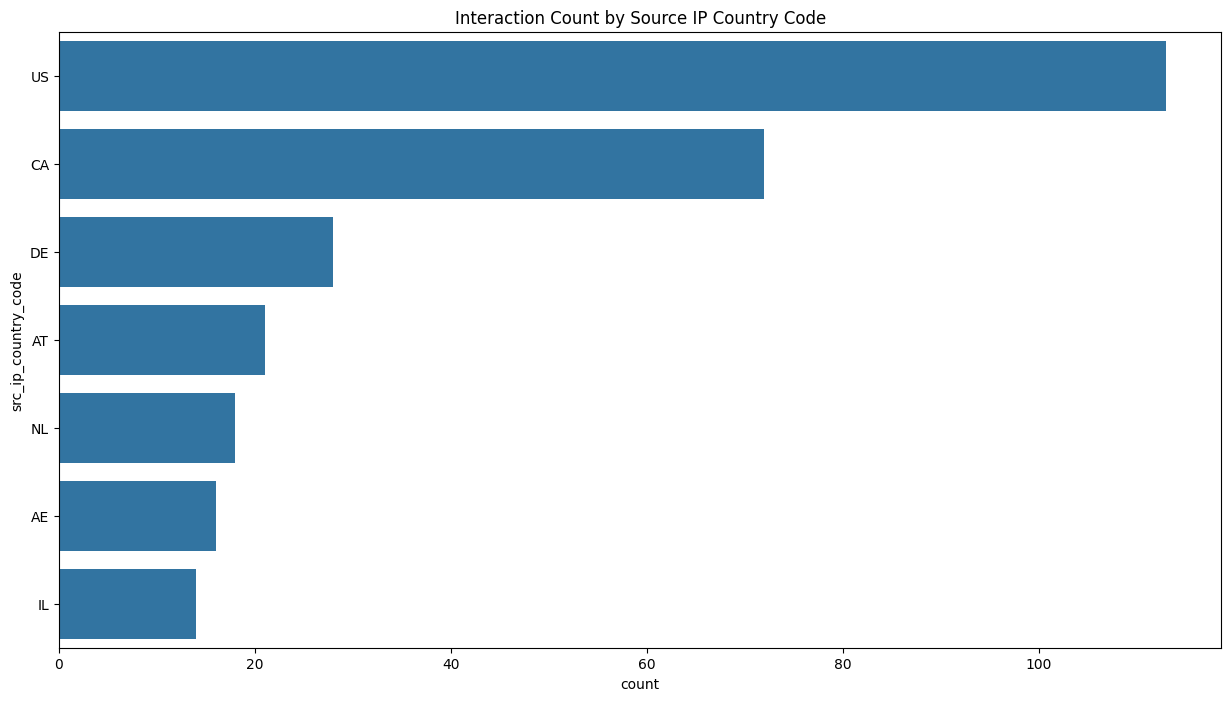

In [12]:
# Country-based Interaction Analysis
plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip_country_code', data=df, order=df['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()

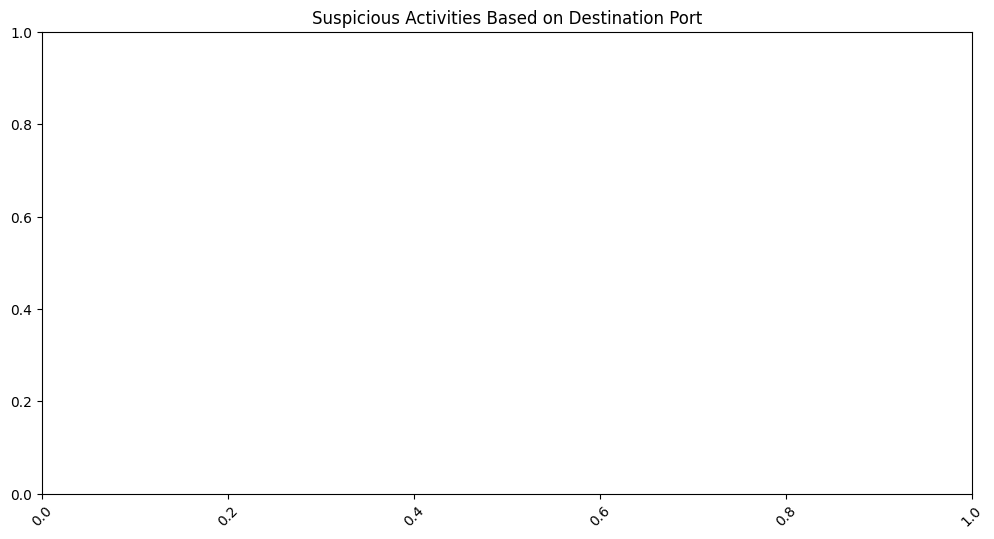

In [13]:
# Suspicious Activities Based on Ports
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', data=df[df['detection_types'] == 'Suspicious'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

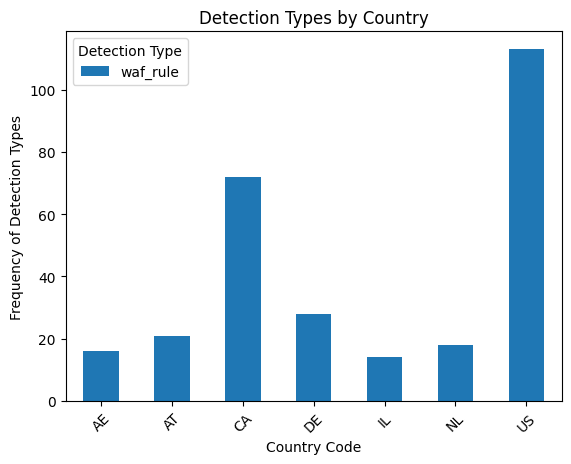

In [14]:
import pandas as pd

# Detection Types by Country (Stacked Bar Chart)
detection_types_by_country = pd.crosstab(df['src_ip_country_code'], df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True)
plt.title('Detection Types by Country')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

Modeling: Anomaly Detection

In [16]:
from sklearn.ensemble import IsolationForest

# Ensure all feature columns are filled and do not contain NaN values
df['session_duration'].fillna(0, inplace=True)  # Replace 0 with a sensible default if applicable
df['avg_packet_size'].fillna(0, inplace=True)   # Replace 0 with a sensible default if applicable

# Selecting features for anomaly detection
features = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]
print("Features used for model:")
print(features.head())  # Display the first few rows to check the feature setup

# Initialize the model with a specified contamination factor
contamination_factor = 0.05  # Adjust this based on your understanding of the dataset
model = IsolationForest(contamination=contamination_factor, random_state=42)

# Fit and predict anomalies
df['anomaly'] = model.fit_predict(features)

# Convert anomaly labels from -1 and 1 to 'Suspicious' and 'Normal'
df['anomaly'] = df['anomaly'].map({-1: 'Suspicious', 1: 'Normal'})

# Output the results
print("Anomaly counts:")
print(df['anomaly'].value_counts())

# Display some of the anomalies
print("Examples of detected anomalies:")
print(df[df['anomaly'] == 'Suspicious'].head())

Features used for model:
   bytes_in  bytes_out  session_duration  avg_packet_size
0      5602      12990             600.0        30.986667
1     30912      18186             600.0        81.830000
2     28506      13468             600.0        69.956667
3     30546      14278             600.0        74.706667
4      6526      13892             600.0        34.030000
Anomaly counts:
anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64
Examples of detected anomalies:
     bytes_in  bytes_out             creation_time                  end_time  \
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   

             src_ip src_ip_c

<ipython-input-16-542a9f51b716>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['session_duration'].fillna(0, inplace=True)  # Replace 0 with a sensible default if applicable
<ipython-input-16-542a9f51b716>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

Evaluation

In [17]:
# Check the proportion of anomalies detected
print(df['anomaly'].value_counts())

# Display anomaly samples
suspicious_activities = df[df['anomaly'] == 'Suspicious']
print(suspicious_activities.head())

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64
     bytes_in  bytes_out             creation_time                  end_time  \
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   

             src_ip src_ip_country_code protocol  response.code  dst_port  \
36    155.91.45.242                  US    HTTPS            200       443   
87   165.225.240.79                  NL    HTTPS            200       443   
116   155.91.45.242                  US    HTTPS            200       443   
132  165.225.240.79                  NL    HTTPS            200       443   
153   155.91.45.242                  US    HTTPS            200 

Visualization of Anomalies

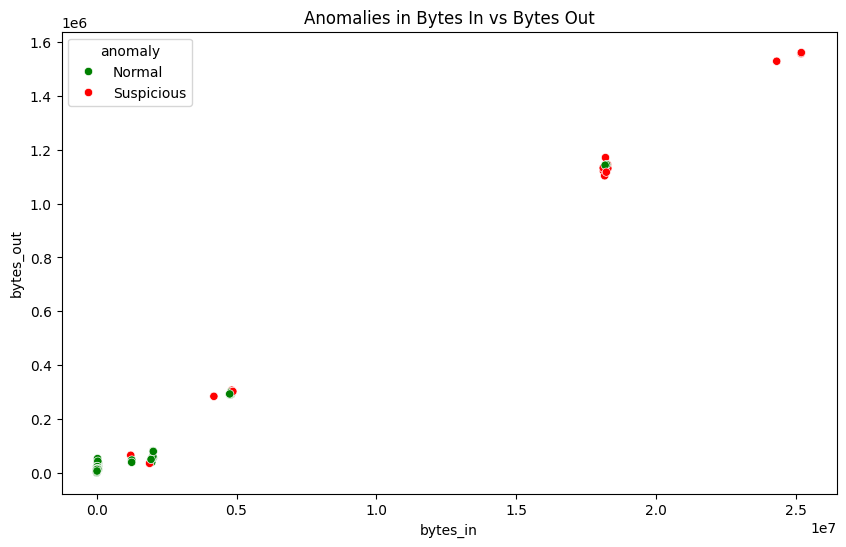

In [18]:
# Visualize bytes_in vs bytes_out with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly', data=df, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()

Report Findings

In [19]:
report = f"""
Suspicious Web Traffic Analysis Report
=====================================
- Total Sessions Analyzed: {len(df)}
- Suspicious Activities Detected: {df['anomaly'].value_counts()['Suspicious']}
- Top Countries with Suspicious Traffic: {df['src_ip_country_code'].value_counts().head(5).to_dict()}
- Most Targeted Ports: {df[df['anomaly'] == 'Suspicious']['dst_port'].value_counts().head(5).to_dict()}
"""
print(report)


Suspicious Web Traffic Analysis Report
- Total Sessions Analyzed: 282
- Suspicious Activities Detected: 15
- Top Countries with Suspicious Traffic: {'US': 113, 'CA': 72, 'DE': 28, 'AT': 21, 'NL': 18}
- Most Targeted Ports: {443: 15}

